In [4052]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from sklearn.linear_model import LinearRegression

In [4053]:
df = pd.read_csv("https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_forecasts.csv")
df

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp
0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.00000,0.00000,1.00000,2.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.77131,0.50710,0.32911,2022-12-06 20:55:05 UTC
1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.00000,0.00000,1.00000,2.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC
2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.00000,1.00000,0.00000,7.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC
3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC
4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2022-11-16 16:00:55 UTC,Saudi Arabia,C,56.86592,1.50018,0.99118,0.59721,0.79021,1.61258,-2.26444,...,0.06973,0.17476,0.29436,0.46115,0.24449,0.06913,0.02164,0.00516,0.00132,2022-12-06 20:55:05 UTC
156,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.05911,0.15706,0.30240,0.48143,0.21617,0.06500,0.02062,0.00454,0.00124,2022-12-06 20:55:05 UTC
157,2022-11-16 16:00:55 UTC,Qatar,A,51.00223,1.57111,1.31642,0.56555,0.68681,1.74764,-2.95133,...,0.06806,0.14850,0.25634,0.52710,0.21656,0.06588,0.01840,0.00399,0.00096,2022-12-06 20:55:05 UTC
158,2022-11-16 16:00:55 UTC,Ghana,H,58.62702,1.43347,0.85806,0.46730,0.80877,1.72393,-2.74111,...,0.04662,0.13341,0.28475,0.53522,0.18003,0.03586,0.00945,0.00284,0.00063,2022-12-06 20:55:05 UTC


In [4054]:
dfteam1 = df.drop_duplicates(subset="team", keep = "first").reset_index()
dfteam1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.77131,0.50710,0.32911,2022-12-06 20:55:05 UTC
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC
6,6,2022-12-06 20:54:12 UTC,Croatia,F,78.99496,2.16748,0.57260,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.22869,0.09390,0.03901,2022-12-06 20:55:05 UTC
7,7,2022-12-06 20:54:12 UTC,Morocco,F,74.44986,1.80298,0.52490,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.31749,0.10599,0.03232,2022-12-06 20:55:05 UTC
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC
9,9,2022-12-06 20:54:12 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC


In [4055]:
model = LinearRegression()
model = model.fit(dfteam1[["sim_wins", "spi", "goals_scored"]], dfteam1["win_league"])
dfteam1["predict_results"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored"]])
dfteam1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.77131,0.50710,0.32911,2022-12-06 20:55:05 UTC,0.124059
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615
6,6,2022-12-06 20:54:12 UTC,Croatia,F,78.99496,2.16748,0.57260,1.0,2.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.22869,0.09390,0.03901,2022-12-06 20:55:05 UTC,0.038539
7,7,2022-12-06 20:54:12 UTC,Morocco,F,74.44986,1.80298,0.52490,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.31749,0.10599,0.03232,2022-12-06 20:55:05 UTC,0.057622
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.062536
9,9,2022-12-06 20:54:12 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.052907


In [4056]:
dfcandidate = dfteam1.sort_values("predict_results", ascending = False)
dfcandidate

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.77131,0.50710,0.32911,2022-12-06 20:55:05 UTC,0.124059
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052
16,16,2022-12-06 20:54:12 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.064836
10,10,2022-12-06 20:54:12 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.064040
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.062536
22,22,2022-12-06 20:54:12 UTC,Belgium,F,80.91900,2.43900,0.65161,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.058747


In [4057]:
dfA16 = dfcandidate[df.group == "A"].head(n = 2)
dfA16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\1248350719.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfA16 = dfcandidate[df.group == "A"].head(n = 2)


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615
9,9,2022-12-06 20:54:12 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.052907


In [4058]:
dfB16 = dfcandidate[df.group == "B"].head(n = 2)
dfB16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\2245931670.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB16 = dfcandidate[df.group == "B"].head(n = 2)


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052
12,12,2022-12-06 20:54:12 UTC,USA,B,73.39400,1.95077,0.67160,1.0,2.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.029646


In [4059]:
dfC16 = dfcandidate[df.group == "C"].head(n = 2)
dfC16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\2619915074.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfC16 = dfcandidate[df.group == "C"].head(n = 2)


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800
21,21,2022-12-06 20:54:12 UTC,Mexico,C,74.06856,1.87596,0.59088,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.031838


In [4060]:
dfD16 = dfcandidate[df.group == "D"].head(n = 2)
dfD16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\3568035520.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfD16 = dfcandidate[df.group == "D"].head(n = 2)


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811
11,11,2022-12-06 20:54:12 UTC,Australia,D,64.25889,1.62507,0.79797,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.029164


In [4061]:
dfE16 = dfcandidate[df.group == "E"].head(n = 2)
dfE16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\3174875314.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfE16 = dfcandidate[df.group == "E"].head(n = 2)


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
16,16,2022-12-06 20:54:12 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.064836
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.062536


In [4062]:
dfF16 = dfcandidate[df.group == "F"].head(n = 2)
dfF16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\2577019320.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfF16 = dfcandidate[df.group == "F"].head(n = 2)


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
22,22,2022-12-06 20:54:12 UTC,Belgium,F,80.91900,2.43900,0.65161,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.058747
7,7,2022-12-06 20:54:12 UTC,Morocco,F,74.44986,1.80298,0.52490,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.31749,0.10599,0.03232,2022-12-06 20:55:05 UTC,0.057622


In [4063]:
dfG16 = dfcandidate[df.group == "G"].head(n = 2)
dfG16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\1284428377.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfG16 = dfcandidate[df.group == "G"].head(n = 2)


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.77131,0.5071,0.32911,2022-12-06 20:55:05 UTC,0.124059
10,10,2022-12-06 20:54:12 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.00000,0.0000,0.00000,2022-12-06 20:55:05 UTC,0.064040


In [4064]:
dfH16 = dfcandidate[df.group == "H"].head(n = 2)
dfH16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\3074301813.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfH16 = dfcandidate[df.group == "H"].head(n = 2)


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097
18,18,2022-12-06 20:54:12 UTC,Uruguay,H,79.24157,2.08441,0.50927,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.048645


In [4065]:
dfAwinners = dfA16.sort_values("predict_results", ascending = False).head(n = 1)
dfAwinners

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615


In [4066]:
dfARunners_up = dfA16.sort_values("predict_results").head(n = 1)
dfARunners_up

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
9,9,2022-12-06 20:54:12 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.052907


In [4067]:
dfBwinners = dfB16.sort_values("predict_results", ascending = False).head(n = 1)
dfBwinners

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052


In [4068]:
dfBRunners_up = dfB16.sort_values("predict_results").head(n = 1)
dfBRunners_up

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
12,12,2022-12-06 20:54:12 UTC,USA,B,73.394,1.95077,0.6716,1.0,2.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.029646


In [4069]:
dfCwinners = dfC16.sort_values("predict_results", ascending = False).head(n = 1)
dfCwinners

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.5762,0.3988,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.0948


In [4070]:
dfCRunners_up = dfC16.sort_values("predict_results").head(n = 1)
dfCRunners_up

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
21,21,2022-12-06 20:54:12 UTC,Mexico,C,74.06856,1.87596,0.59088,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.031838


In [4071]:
dfDwinners = dfD16.sort_values("predict_results", ascending = False).head(n = 1)
dfDwinners

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
4,4,2022-12-06 20:54:12 UTC,France,D,87.5287,2.80437,0.50561,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811


In [4072]:
dfDRunners_up = dfD16.sort_values("predict_results").head(n = 1)
dfDRunners_up

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
11,11,2022-12-06 20:54:12 UTC,Australia,D,64.25889,1.62507,0.79797,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.029164


In [4073]:
dfEwinners = dfE16.sort_values("predict_results", ascending = False).head(n = 1)
dfEwinners

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
16,16,2022-12-06 20:54:12 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.064836


In [4074]:
dfERunners_up = dfE16.sort_values("predict_results").head(n = 1)
dfERunners_up

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.062536


In [4075]:
dfFwinners = dfF16.sort_values("predict_results", ascending = False).head(n = 1)
dfFwinners

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
22,22,2022-12-06 20:54:12 UTC,Belgium,F,80.919,2.439,0.65161,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.058747


In [4076]:
dfFRunners_up = dfF16.sort_values("predict_results").head(n = 1)
dfFRunners_up

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
7,7,2022-12-06 20:54:12 UTC,Morocco,F,74.44986,1.80298,0.5249,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.31749,0.10599,0.03232,2022-12-06 20:55:05 UTC,0.057622


In [4077]:
dfGwinners = dfG16.sort_values("predict_results", ascending = False).head(n = 1)
dfGwinners

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.77131,0.5071,0.32911,2022-12-06 20:55:05 UTC,0.124059


In [4078]:
dfGRunners_up = dfG16.sort_values("predict_results").head(n = 1)
dfGRunners_up

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
10,10,2022-12-06 20:54:12 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.06404


In [4079]:
dfHwinners = dfH16.sort_values("predict_results", ascending = False).head(n = 1)
dfHwinners

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097


In [4080]:
dfHRunners_up = dfH16.sort_values("predict_results").head(n = 1)
dfHRunners_up

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
18,18,2022-12-06 20:54:12 UTC,Uruguay,H,79.24157,2.08441,0.50927,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.048645


In [4081]:
frame1 = [dfAwinners, dfBRunners_up]
RoundOf16Game1_December3 = pd.concat(frame1)
RoundOf16Game1_December3

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615
12,12,2022-12-06 20:54:12 UTC,USA,B,73.39400,1.95077,0.67160,1.0,2.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.029646


<AxesSubplot: xlabel='team'>

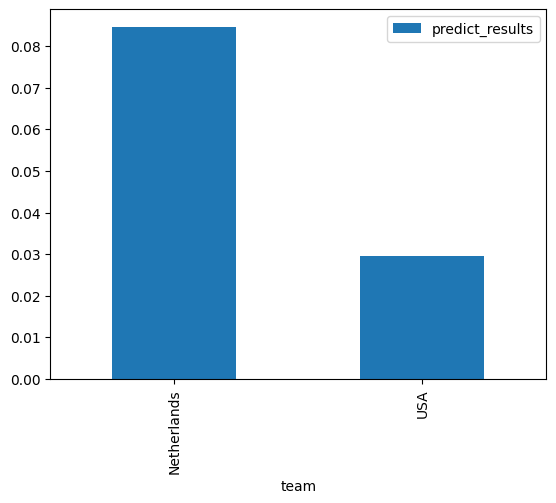

In [4082]:
RoundOf16Game1_December3.reset_index().plot.bar(x="team", y="predict_results")

In [4083]:
WinnersOfMatch49 = RoundOf16Game1_December3.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch49

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615


In [4084]:
frame2 = [dfCwinners, dfDRunners_up]
RoundOf16Game2_December3 = pd.concat(frame2)
RoundOf16Game2_December3

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800
11,11,2022-12-06 20:54:12 UTC,Australia,D,64.25889,1.62507,0.79797,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.029164


<AxesSubplot: xlabel='team'>

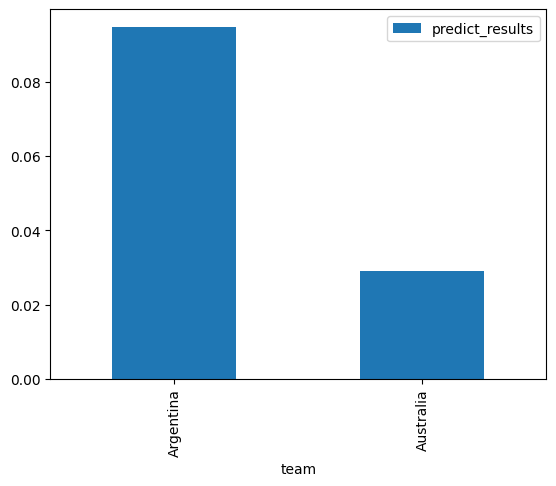

In [4085]:
RoundOf16Game2_December3.reset_index().plot.bar(x="team", y="predict_results")

In [4086]:
WinnersOfMatch50 = RoundOf16Game2_December3.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch50

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.5762,0.3988,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.0948


In [4087]:
frame3 = [dfEwinners, dfFRunners_up]
RoundOf16Game1_December5 = pd.concat(frame3)
RoundOf16Game1_December5

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
16,16,2022-12-06 20:54:12 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.064836
7,7,2022-12-06 20:54:12 UTC,Morocco,F,74.44986,1.80298,0.52490,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.31749,0.10599,0.03232,2022-12-06 20:55:05 UTC,0.057622


<AxesSubplot: xlabel='team'>

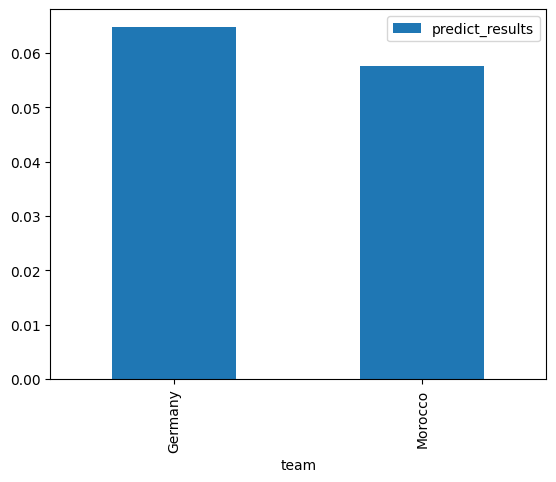

In [4088]:
RoundOf16Game1_December5.reset_index().plot.bar(x="team", y="predict_results")

In [4089]:
WinnersOfMatch53 = RoundOf16Game1_December5.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch53

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
16,16,2022-12-06 20:54:12 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.064836


In [4090]:
frame4 = [dfGwinners, dfHRunners_up]
RoundOf16Game2_December5 = pd.concat(frame4)
RoundOf16Game2_December5

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.77131,0.5071,0.32911,2022-12-06 20:55:05 UTC,0.124059
18,18,2022-12-06 20:54:12 UTC,Uruguay,H,79.24157,2.08441,0.50927,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.00000,0.0000,0.00000,2022-12-06 20:55:05 UTC,0.048645


<AxesSubplot: xlabel='team'>

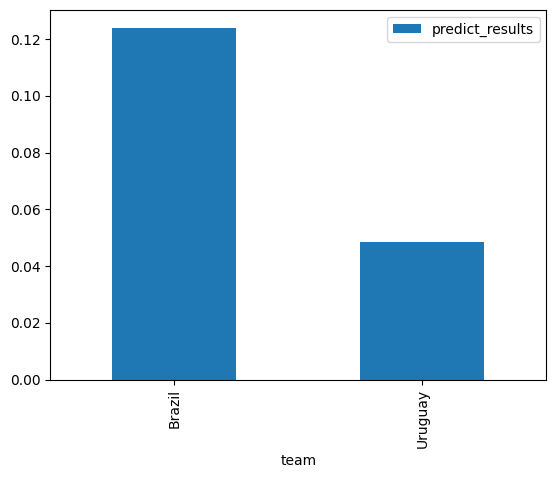

In [4091]:
RoundOf16Game2_December5.reset_index().plot.bar(x="team", y="predict_results")

In [4092]:
WinnersOfMatch54 = RoundOf16Game2_December5.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch54


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.77131,0.5071,0.32911,2022-12-06 20:55:05 UTC,0.124059


In [4093]:
frame5 = [dfBwinners, dfARunners_up]
RoundOf16Game1_December4 = pd.concat(frame5)
RoundOf16Game1_December4

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052
9,9,2022-12-06 20:54:12 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.052907


<AxesSubplot: xlabel='team'>

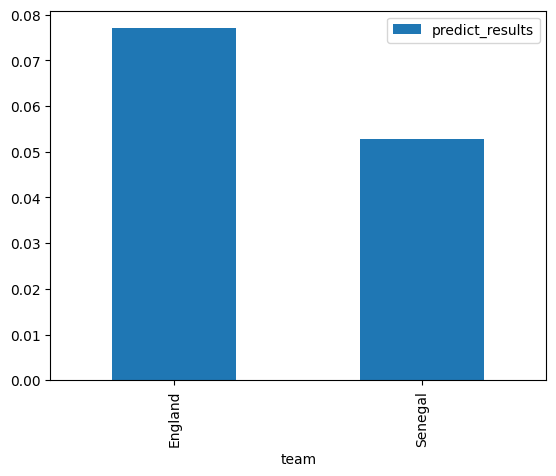

In [4094]:
RoundOf16Game1_December4.reset_index().plot.bar(x="team", y="predict_results")

In [4095]:
WinnersOfMatch51 = RoundOf16Game1_December4.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch51

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052


In [4096]:
frame6 = [dfDwinners, dfCRunners_up]
RoundOf16Game2_December4 = pd.concat(frame6)
RoundOf16Game2_December4

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811
21,21,2022-12-06 20:54:12 UTC,Mexico,C,74.06856,1.87596,0.59088,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.031838


<AxesSubplot: xlabel='team'>

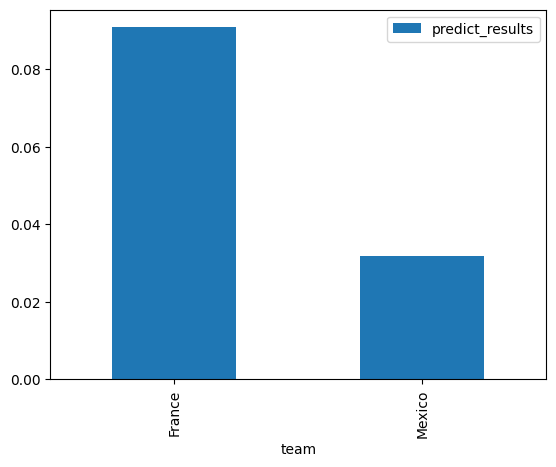

In [4097]:
RoundOf16Game2_December4.reset_index().plot.bar(x="team", y="predict_results")


In [4098]:
WinnersOfMatch52 = RoundOf16Game2_December4.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch52

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
4,4,2022-12-06 20:54:12 UTC,France,D,87.5287,2.80437,0.50561,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811


In [4099]:
frame7 = [dfFwinners, dfERunners_up]
RoundOf16Game1_December6 = pd.concat(frame7)
RoundOf16Game1_December6

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
22,22,2022-12-06 20:54:12 UTC,Belgium,F,80.91900,2.43900,0.65161,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.058747
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.062536


<AxesSubplot: xlabel='team'>

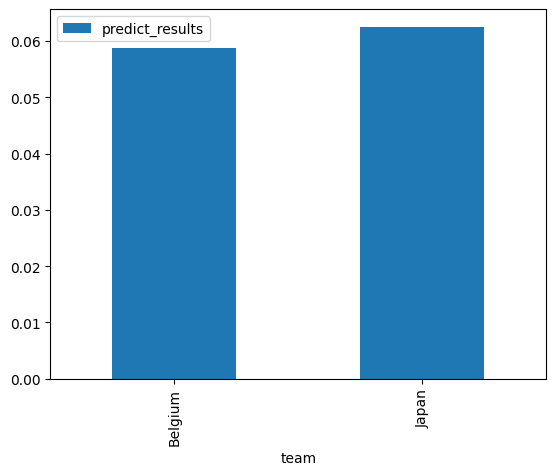

In [4100]:
RoundOf16Game1_December6.reset_index().plot.bar(x="team", y="predict_results")

In [4101]:
WinnersOfMatch55 = RoundOf16Game1_December6.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch55

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.062536


In [4102]:
frame8 = [dfHwinners, dfGRunners_up]
RoundOf16Game2_December6 = pd.concat(frame8)
RoundOf16Game2_December6

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097
10,10,2022-12-06 20:54:12 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.064040


<AxesSubplot: xlabel='team'>

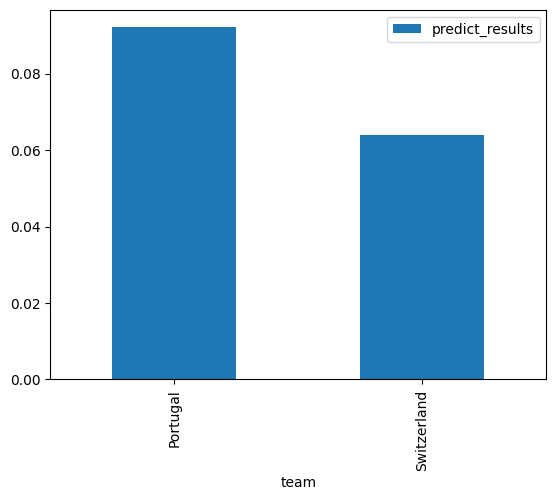

In [4103]:
RoundOf16Game2_December6.reset_index().plot.bar(x="team", y="predict_results")

In [4104]:
WinnersOfMatch56 = RoundOf16Game2_December6.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch56

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097


In [4105]:
frame9 = [WinnersOfMatch49, WinnersOfMatch50]
QuaterFinalsGame1_December9 = pd.concat(frame9)
QuaterFinalsGame1_December9 

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800


<AxesSubplot: xlabel='team'>

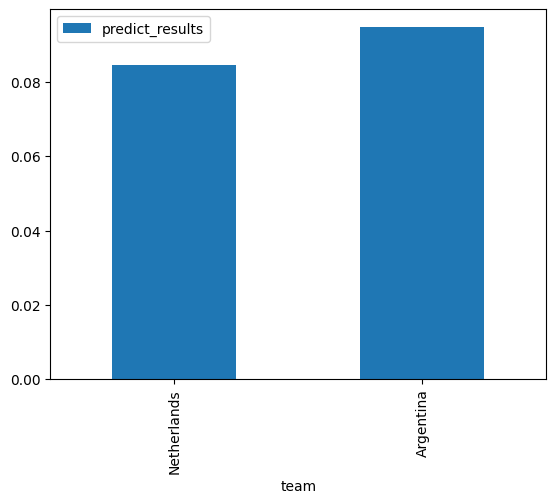

In [4106]:
QuaterFinalsGame1_December9.reset_index().plot.bar(x="team", y="predict_results")

In [4107]:
WinnersOfMatch57 = QuaterFinalsGame1_December9.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch57

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.5762,0.3988,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.0948


In [4108]:
frame10 = [WinnersOfMatch53, WinnersOfMatch54]
QuaterFinalsGame2_December9 = pd.concat(frame10)
QuaterFinalsGame2_December9 

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
16,16,2022-12-06 20:54:12 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.00000,0.0000,0.00000,2022-12-06 20:55:05 UTC,0.064836
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.77131,0.5071,0.32911,2022-12-06 20:55:05 UTC,0.124059


<AxesSubplot: xlabel='team'>

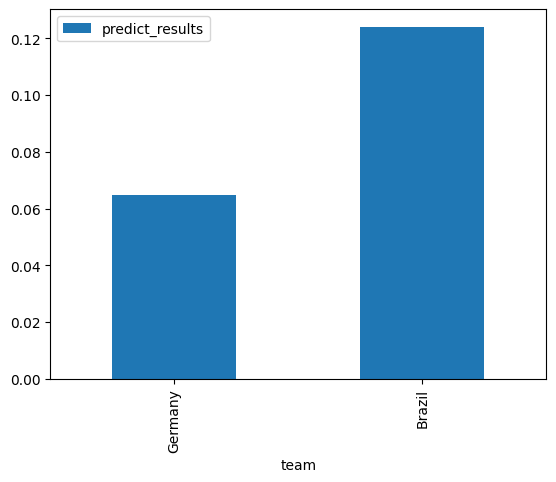

In [4109]:
QuaterFinalsGame2_December9.reset_index().plot.bar(x="team", y="predict_results")

In [4110]:
WinnersOfMatch58 = QuaterFinalsGame2_December9.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch58

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.77131,0.5071,0.32911,2022-12-06 20:55:05 UTC,0.124059


In [4111]:
frame11 = [WinnersOfMatch51, WinnersOfMatch52]
QuaterFinalsGame1_December10 = pd.concat(frame11)
QuaterFinalsGame1_December10

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811


<AxesSubplot: xlabel='team'>

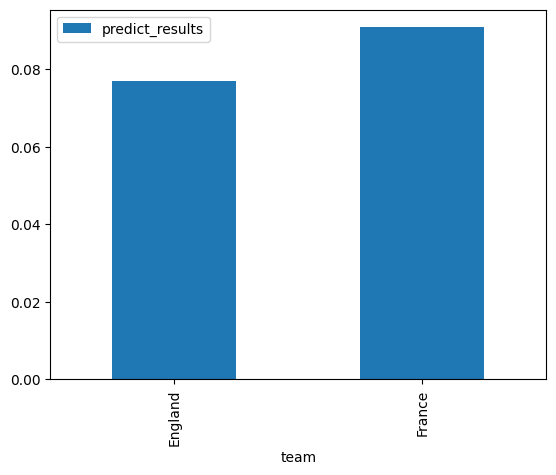

In [4112]:
QuaterFinalsGame1_December10.reset_index().plot.bar(x="team", y="predict_results")


In [4113]:
WinnersOfMatch59 = QuaterFinalsGame1_December10.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch59

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
4,4,2022-12-06 20:54:12 UTC,France,D,87.5287,2.80437,0.50561,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811


In [4114]:
frame12 = [WinnersOfMatch55, WinnersOfMatch56]
QuaterFinalsGame2_December10 = pd.concat(frame12)
QuaterFinalsGame2_December10

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.062536
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097


<AxesSubplot: xlabel='team'>

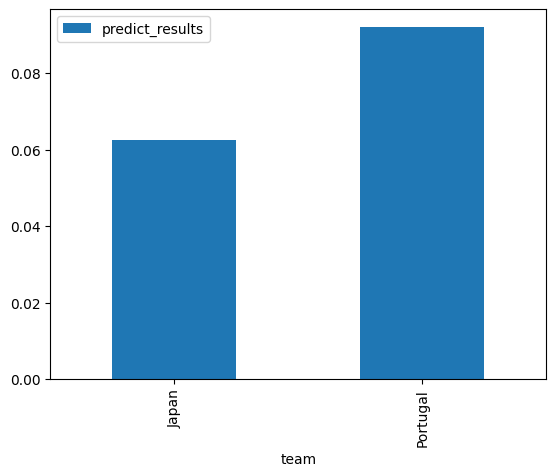

In [4115]:
QuaterFinalsGame2_December10.reset_index().plot.bar(x="team", y="predict_results")

In [4116]:
WinnersOfMatch60 = QuaterFinalsGame2_December10.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch60

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097


In [4117]:
frame13 = [WinnersOfMatch57, WinnersOfMatch58]
SemiFinalsGame1_December13 = pd.concat(frame13)
SemiFinalsGame1_December13

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.77131,0.50710,0.32911,2022-12-06 20:55:05 UTC,0.124059


<AxesSubplot: xlabel='team'>

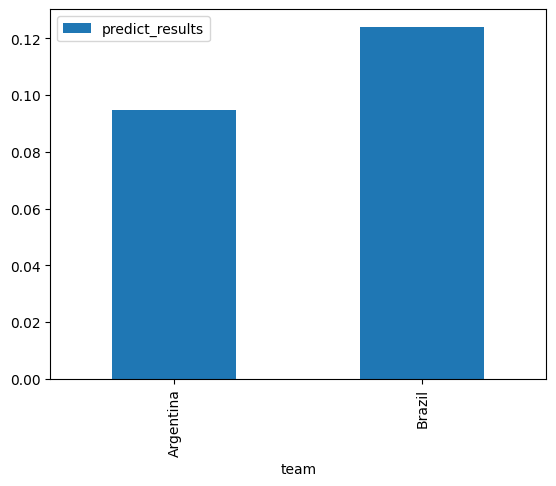

In [4118]:
SemiFinalsGame1_December13.reset_index().plot.bar(x="team", y="predict_results")

In [4119]:
WinnersOfMatch61 = SemiFinalsGame1_December13.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch61

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.77131,0.5071,0.32911,2022-12-06 20:55:05 UTC,0.124059


In [4120]:
frame14 = [WinnersOfMatch59, WinnersOfMatch60]
SemiFinalsGame1_December14 = pd.concat(frame14)
SemiFinalsGame1_December14

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097


<AxesSubplot: xlabel='team'>

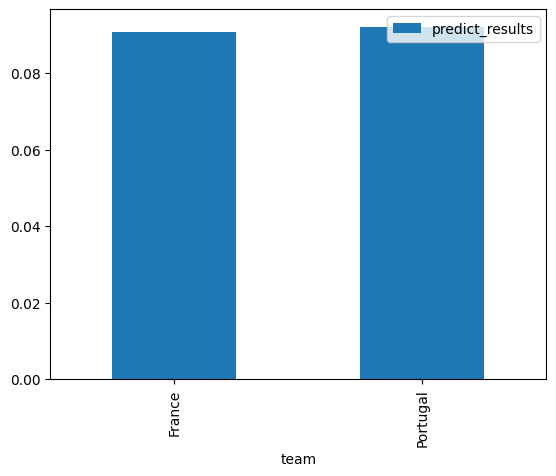

In [4121]:
SemiFinalsGame1_December14.reset_index().plot.bar(x="team", y="predict_results")

In [4122]:
WinnersOfMatch62 = SemiFinalsGame1_December14.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch62

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097


In [4123]:
frame15 = [WinnersOfMatch61, WinnersOfMatch62]
FinalGame1_December14 = pd.concat(frame15)
FinalGame1_December14

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.77131,0.50710,0.32911,2022-12-06 20:55:05 UTC,0.124059
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097


<AxesSubplot: xlabel='team'>

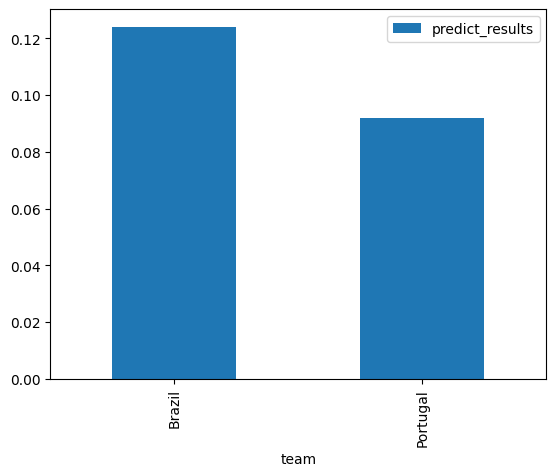

In [4124]:
FinalGame1_December14.reset_index().plot.bar(x="team", y="predict_results")

In [4125]:
WinnersOfFIFA2022WorldCup = FinalGame1_December14.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfFIFA2022WorldCup

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.77131,0.5071,0.32911,2022-12-06 20:55:05 UTC,0.124059


In [4126]:
dfgame1candidate1 = dfcandidate[dfcandidate.team == "Japan"]
dfgame1candidate1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.062536


In [4127]:
dfgame1candidate2 = dfcandidate[dfcandidate.team == "Spain"]
dfgame1candidate2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
13,13,2022-12-06 20:54:12 UTC,Spain,E,88.50675,2.59723,0.34458,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.046181


In [4128]:
frameA = [dfgame1candidate1, dfgame1candidate2]
game1 = pd.concat(frameA)
game1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.062536
13,13,2022-12-06 20:54:12 UTC,Spain,E,88.50675,2.59723,0.34458,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.046181


<AxesSubplot: xlabel='team'>

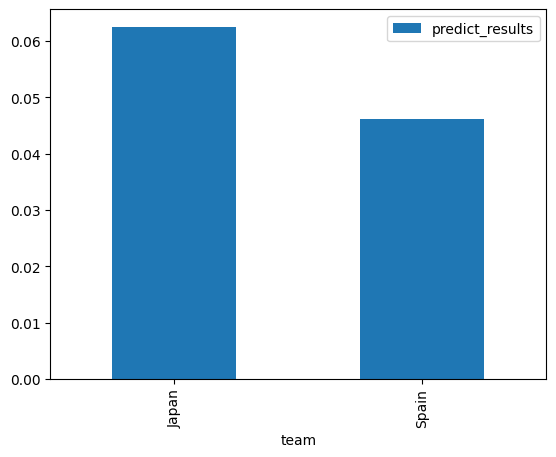

In [4129]:
game1.reset_index().plot.bar(x="team", y="predict_results")

In [4130]:
WinnerOfGame1 = game1.sort_values("predict_results", ascending = False).head(n = 1)
WinnerOfGame1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.062536


In [4131]:
dfgame2candidate1 = dfcandidate[dfcandidate.team == "Costa Rica"]
dfgame2candidate1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
26,26,2022-12-06 20:54:12 UTC,Costa Rica,E,52.66186,1.3806,1.05339,1.0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,-0.042365


In [4132]:
dfgame2candidate2 = dfcandidate[dfcandidate.team == "Germany"]
dfgame2candidate2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
16,16,2022-12-06 20:54:12 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.064836


In [4133]:
frameB = [dfgame2candidate1, dfgame2candidate2]
game2 = pd.concat(frameB)
game2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
26,26,2022-12-06 20:54:12 UTC,Costa Rica,E,52.66186,1.38060,1.05339,1.0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,-0.042365
16,16,2022-12-06 20:54:12 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.064836


<AxesSubplot: xlabel='team'>

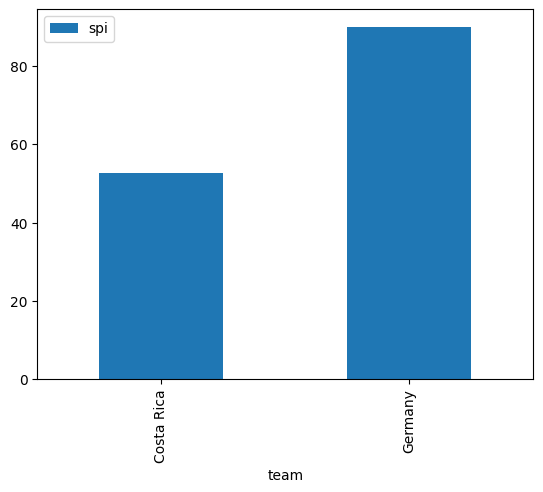

In [4134]:
game2.reset_index().plot.bar(x="team", y="spi")

In [4135]:
WinnerOfGame2 = game2.sort_values("predict_results", ascending = False).head(n = 1)
WinnerOfGame2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
16,16,2022-12-06 20:54:12 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.064836


In [4136]:
frameR16 = [dfA16, dfB16, dfC16, dfD16, dfE16, dfF16, dfG16, dfH16]
RoundOf16Candidate = pd.concat(frameR16)
RoundOf16Candidate

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615
9,9,2022-12-06 20:54:12 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.052907
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052
12,12,2022-12-06 20:54:12 UTC,USA,B,73.39400,1.95077,0.67160,1.0,2.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.029646
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800
21,21,2022-12-06 20:54:12 UTC,Mexico,C,74.06856,1.87596,0.59088,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.031838
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811
11,11,2022-12-06 20:54:12 UTC,Australia,D,64.25889,1.62507,0.79797,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.029164
16,16,2022-12-06 20:54:12 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.064836
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.062536


In [4137]:
model = LinearRegression()
model = model.fit(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]], dfteam1["make_round_of_16"])
dfteam1["predict_ChanceOfRoundOf16"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]])
dfteam1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.77131,0.50710,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052,1.195289
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800,0.936514
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811,0.925539
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615,1.026648
6,6,2022-12-06 20:54:12 UTC,Croatia,F,78.99496,2.16748,0.57260,1.0,2.0,0.0,...,0.0,0.0,1.0,1.0,0.22869,0.09390,0.03901,2022-12-06 20:55:05 UTC,0.038539,0.634488
7,7,2022-12-06 20:54:12 UTC,Morocco,F,74.44986,1.80298,0.52490,2.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.31749,0.10599,0.03232,2022-12-06 20:55:05 UTC,0.057622,1.008643
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.062536,0.851336
9,9,2022-12-06 20:54:12 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.052907,0.848739


In [4138]:
dfCandidate = dfteam1.sort_values("predict_ChanceOfRoundOf16", ascending = False)
dfCandidate

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052,1.195289
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615,1.026648
7,7,2022-12-06 20:54:12 UTC,Morocco,F,74.44986,1.80298,0.52490,2.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.31749,0.10599,0.03232,2022-12-06 20:55:05 UTC,0.057622,1.008643
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800,0.936514
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811,0.925539
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.77131,0.50710,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.062536,0.851336
10,10,2022-12-06 20:54:12 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.064040,0.849103
9,9,2022-12-06 20:54:12 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.052907,0.848739
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624


In [4139]:
dfgroupHcandidate1 = dfCandidate[dfcandidate.team == "South Korea"]
dfgroupHcandidate1

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\346358755.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupHcandidate1 = dfCandidate[dfcandidate.team == "South Korea"]


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
14,14,2022-12-06 20:54:12 UTC,South Korea,H,72.35291,1.95504,0.71893,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.016959,0.441535


In [4140]:
dfgroupHcandidate2 = dfCandidate[dfcandidate.team == "Portugal"]
dfgroupHcandidate2

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\3815101000.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupHcandidate2 = dfCandidate[dfcandidate.team == "Portugal"]


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624


In [4141]:
frameH1 = [dfgroupHcandidate1, dfgroupHcandidate2]
gameH1 = pd.concat(frameH1)
gameH1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
14,14,2022-12-06 20:54:12 UTC,South Korea,H,72.35291,1.95504,0.71893,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.016959,0.441535
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624


<AxesSubplot: xlabel='team'>

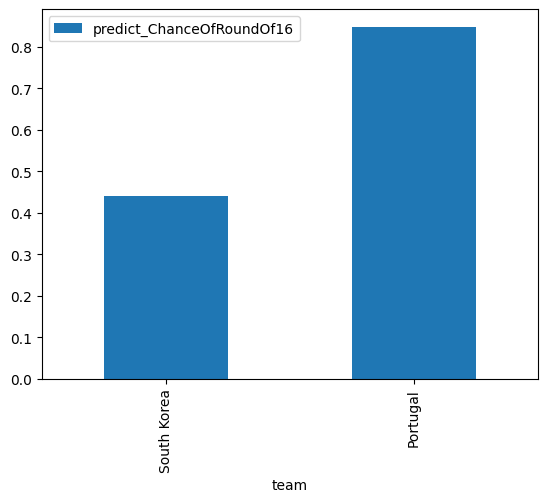

In [4142]:
gameH1.reset_index().plot.bar(x="team", y="predict_ChanceOfRoundOf16")

In [4143]:
WinnerOfGameH1 = gameH1.sort_values("predict_ChanceOfRoundOf16", ascending = False).head(n = 1)
WinnerOfGameH1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624


In [4144]:
dfgroupHcandidate3 = dfCandidate[dfcandidate.team == "Ghana"]
dfgroupHcandidate3

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\1798223390.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupHcandidate3 = dfCandidate[dfcandidate.team == "Ghana"]


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
25,25,2022-12-06 20:54:12 UTC,Ghana,H,60.56379,1.60095,0.92839,1.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,-0.025996,0.338436


In [4145]:
dfgroupHcandidate4 = dfCandidate[dfcandidate.team == "Uruguay"]
dfgroupHcandidate4

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\2481320698.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupHcandidate4 = dfCandidate[dfcandidate.team == "Uruguay"]


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
18,18,2022-12-06 20:54:12 UTC,Uruguay,H,79.24157,2.08441,0.50927,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.048645,0.428267


In [4146]:
frameH2 = [dfgroupHcandidate3, dfgroupHcandidate4]
gameH2 = pd.concat(frameH2)
gameH2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
25,25,2022-12-06 20:54:12 UTC,Ghana,H,60.56379,1.60095,0.92839,1.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,-0.025996,0.338436
18,18,2022-12-06 20:54:12 UTC,Uruguay,H,79.24157,2.08441,0.50927,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.048645,0.428267


<AxesSubplot: xlabel='team'>

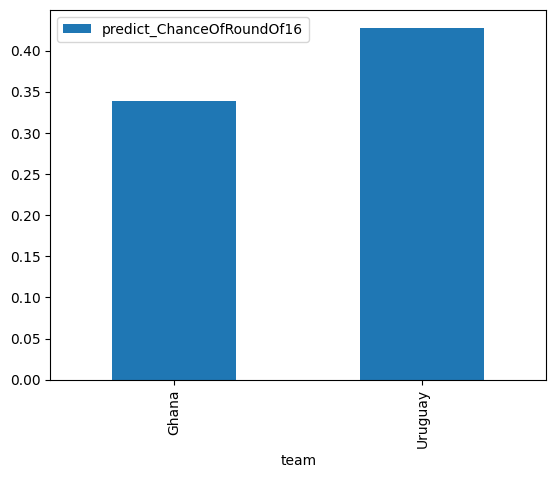

In [4147]:
gameH2.reset_index().plot.bar(x="team", y="predict_ChanceOfRoundOf16")

In [4148]:
WinnerOfGameH2 = gameH2.sort_values("predict_ChanceOfRoundOf16", ascending = False).head(n = 1)
WinnerOfGameH2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
18,18,2022-12-06 20:54:12 UTC,Uruguay,H,79.24157,2.08441,0.50927,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.048645,0.428267


In [4149]:
dfgroupGcandidate1 = dfCandidate[dfcandidate.team == "Serbia"]
dfgroupGcandidate1

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\1947669684.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupGcandidate1 = dfCandidate[dfcandidate.team == "Serbia"]


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
28,28,2022-12-06 20:54:12 UTC,Serbia,G,73.86747,2.23251,0.85078,0.0,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,-0.016623,-0.152994


In [4150]:
dfgroupGcandidate2 = dfCandidate[dfcandidate.team == "Switzerland"]
dfgroupGcandidate2

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\4265024335.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupGcandidate2 = dfCandidate[dfcandidate.team == "Switzerland"]


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
10,10,2022-12-06 20:54:12 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.06404,0.849103


In [4151]:
frameG1 = [dfgroupGcandidate1, dfgroupGcandidate2]
gameG1 = pd.concat(frameG1)
gameG1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
28,28,2022-12-06 20:54:12 UTC,Serbia,G,73.86747,2.23251,0.85078,0.0,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,-0.016623,-0.152994
10,10,2022-12-06 20:54:12 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.064040,0.849103


<AxesSubplot: xlabel='team'>

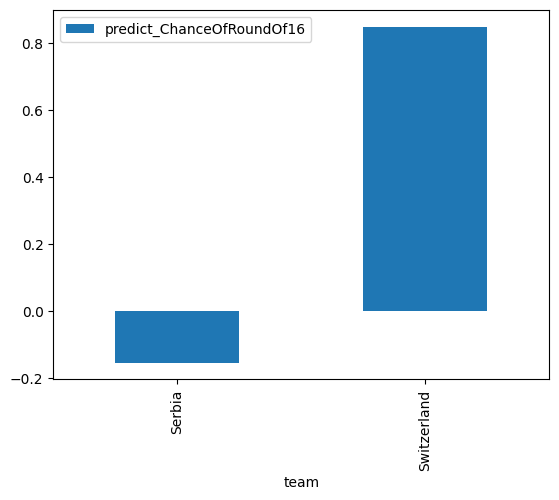

In [4152]:
gameG1.reset_index().plot.bar(x="team", y="predict_ChanceOfRoundOf16")

In [4153]:
WinnerOfGameG1 = gameG1.sort_values("predict_ChanceOfRoundOf16", ascending = False).head(n = 1)
WinnerOfGameG1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
10,10,2022-12-06 20:54:12 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.06404,0.849103


In [4154]:
dfgroupGcandidate3 = dfCandidate[dfcandidate.team == "Cameroon"]
dfgroupGcandidate3

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\1978172570.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupGcandidate3 = dfCandidate[dfcandidate.team == "Cameroon"]


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
20,20,2022-12-06 20:54:12 UTC,Cameroon,G,66.37195,1.77502,0.83343,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,-0.002473,0.470401


In [4155]:
dfgroupGcandidate4 = dfCandidate[dfcandidate.team == "Brazil"]
dfgroupGcandidate4

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\3700774475.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupGcandidate4 = dfCandidate[dfcandidate.team == "Brazil"]


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.77131,0.5071,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848


In [4156]:
frameG2 = [dfgroupGcandidate3, dfgroupGcandidate4]
gameG2 = pd.concat(frameG2)
gameG2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
20,20,2022-12-06 20:54:12 UTC,Cameroon,G,66.37195,1.77502,0.83343,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.00000,0.0000,0.00000,2022-12-06 20:55:05 UTC,-0.002473,0.470401
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.77131,0.5071,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848


<AxesSubplot: xlabel='team'>

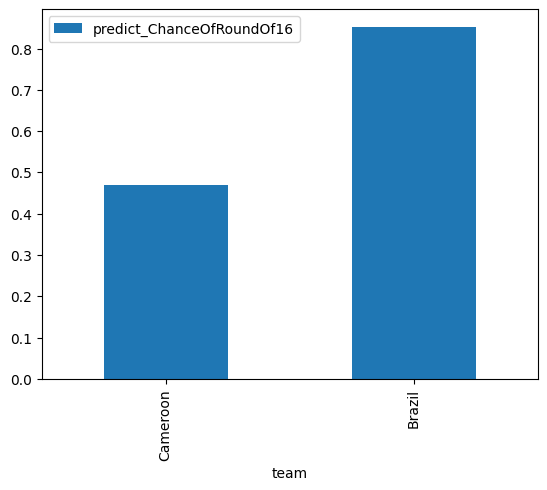

In [4157]:
gameG2.reset_index().plot.bar(x="team", y="predict_ChanceOfRoundOf16")

In [4158]:
WinnerOfGameG2 = gameG2.sort_values("predict_ChanceOfRoundOf16", ascending = False).head(n = 1)
WinnerOfGameG2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.77131,0.5071,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848


In [4159]:
model = LinearRegression()
model = model.fit(dfteam1[[ "spi", "goals_scored", "make_round_of_16"]], dfteam1["make_quarters"])
dfteam1["predict_ChanceOfQuarters"] = model.predict(dfteam1[[ "spi", "goals_scored", "make_round_of_16"]])
dfteam1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,1.0,1.0,0.77131,0.50710,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848,0.682957
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624,0.637636
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,0.0,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052,1.195289,0.669143
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,0.0,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800,0.936514,0.616632
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,0.0,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811,0.925539,0.631793
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,0.0,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615,1.026648,0.570372
6,6,2022-12-06 20:54:12 UTC,Croatia,F,78.99496,2.16748,0.57260,1.0,2.0,0.0,...,0.0,1.0,1.0,0.22869,0.09390,0.03901,2022-12-06 20:55:05 UTC,0.038539,0.634488,0.481569
7,7,2022-12-06 20:54:12 UTC,Morocco,F,74.44986,1.80298,0.52490,2.0,1.0,0.0,...,0.0,1.0,1.0,0.31749,0.10599,0.03232,2022-12-06 20:55:05 UTC,0.057622,1.008643,0.414502
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.062536,0.851336,0.436820
9,9,2022-12-06 20:54:12 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.052907,0.848739,0.426365


In [4160]:
dfCandidateQ = dfteam1.sort_values("predict_ChanceOfQuarters", ascending = False)
dfCandidateQ

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,1.0,1.0,0.77131,0.50710,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848,0.682957
13,13,2022-12-06 20:54:12 UTC,Spain,E,88.50675,2.59723,0.34458,1.0,1.0,1.0,...,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.046181,0.763641,0.682675
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,0.0,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052,1.195289,0.669143
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624,0.637636
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,0.0,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811,0.925539,0.631793
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,0.0,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800,0.936514,0.616632
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,0.0,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615,1.026648,0.570372
6,6,2022-12-06 20:54:12 UTC,Croatia,F,78.99496,2.16748,0.57260,1.0,2.0,0.0,...,0.0,1.0,1.0,0.22869,0.09390,0.03901,2022-12-06 20:55:05 UTC,0.038539,0.634488,0.481569
10,10,2022-12-06 20:54:12 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.064040,0.849103,0.443647
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.062536,0.851336,0.436820


In [4161]:
dfQuarter1 = dfCandidateQ[dfCandidateQ.team == "Netherlands"]
dfQuarter1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,0.0,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615,1.026648,0.570372


In [4162]:
dfQuarter2 = dfCandidateQ[dfCandidateQ.team == "USA"]
dfQuarter2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
12,12,2022-12-06 20:54:12 UTC,USA,B,73.394,1.95077,0.6716,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.029646,0.531494,0.374622


In [4163]:
frameQ1 = [dfQuarter1, dfQuarter2]
gameQ1 = pd.concat(frameQ1)
gameQ1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,0.0,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615,1.026648,0.570372
12,12,2022-12-06 20:54:12 UTC,USA,B,73.39400,1.95077,0.67160,1.0,2.0,0.0,...,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.029646,0.531494,0.374622


<AxesSubplot: xlabel='team'>

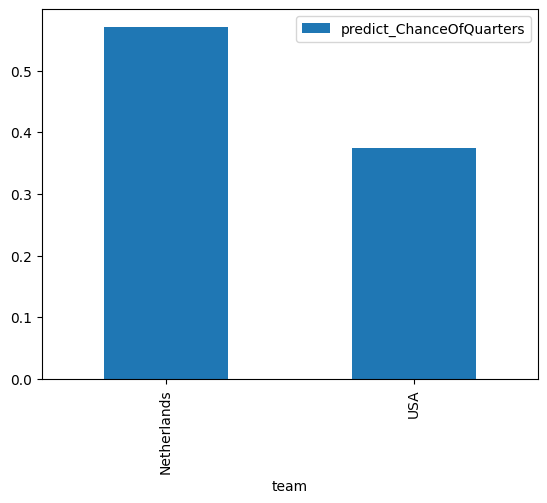

In [4164]:
gameQ1.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [4165]:
WinnerOfGameQ1 = gameQ1.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,0.0,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615,1.026648,0.570372


In [4166]:
dfQuarter3 = dfCandidateQ[dfCandidateQ.team == "Argentina"]
dfQuarter3

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.5762,0.3988,2.0,0.0,1.0,...,0.0,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.0948,0.936514,0.616632


In [4167]:
dfQuarter4 = dfCandidateQ[dfCandidateQ.team == "Australia"]
dfQuarter4

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
11,11,2022-12-06 20:54:12 UTC,Australia,D,64.25889,1.62507,0.79797,2.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.029164,0.767804,0.251975


In [4168]:
frameQ2 = [dfQuarter3, dfQuarter4]
gameQ2 = pd.concat(frameQ2)
gameQ2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,0.0,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800,0.936514,0.616632
11,11,2022-12-06 20:54:12 UTC,Australia,D,64.25889,1.62507,0.79797,2.0,0.0,1.0,...,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.029164,0.767804,0.251975


<AxesSubplot: xlabel='team'>

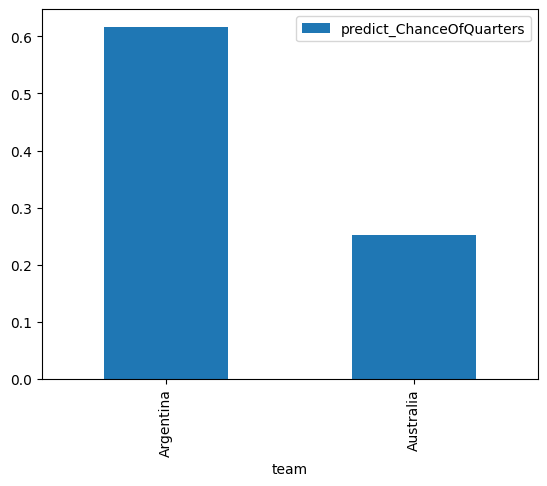

In [4169]:
gameQ2.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [4170]:
WinnerOfGameQ2 = gameQ2.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.5762,0.3988,2.0,0.0,1.0,...,0.0,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.0948,0.936514,0.616632


In [4171]:
dfQuarter5 = dfCandidateQ[dfCandidateQ.team == "Japan"]
dfQuarter5

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.062536,0.851336,0.43682


In [4172]:
dfQuarter6 = dfCandidateQ[dfCandidateQ.team == "Croatia"]
dfQuarter6

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
6,6,2022-12-06 20:54:12 UTC,Croatia,F,78.99496,2.16748,0.5726,1.0,2.0,0.0,...,0.0,1.0,1.0,0.22869,0.0939,0.03901,2022-12-06 20:55:05 UTC,0.038539,0.634488,0.481569


In [4173]:
frameQ3 = [dfQuarter5, dfQuarter6]
gameQ3 = pd.concat(frameQ3)
gameQ3

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,1.0,0.0,0.00000,0.0000,0.00000,2022-12-06 20:55:05 UTC,0.062536,0.851336,0.436820
6,6,2022-12-06 20:54:12 UTC,Croatia,F,78.99496,2.16748,0.57260,1.0,2.0,0.0,...,0.0,1.0,1.0,0.22869,0.0939,0.03901,2022-12-06 20:55:05 UTC,0.038539,0.634488,0.481569


<AxesSubplot: xlabel='team'>

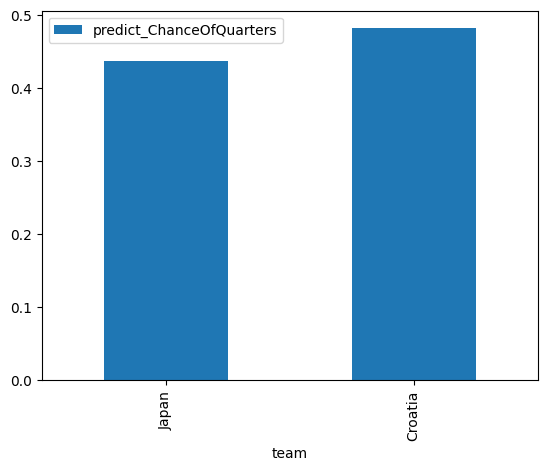

In [4174]:
gameQ3.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [4175]:
WinnerOfGameQ3 = gameQ3.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ3

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
6,6,2022-12-06 20:54:12 UTC,Croatia,F,78.99496,2.16748,0.5726,1.0,2.0,0.0,...,0.0,1.0,1.0,0.22869,0.0939,0.03901,2022-12-06 20:55:05 UTC,0.038539,0.634488,0.481569


In [4176]:
dfQuarter7 = dfCandidateQ[dfCandidateQ.team == "Brazil"]
dfQuarter7

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,1.0,1.0,0.77131,0.5071,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848,0.682957


In [4177]:
dfQuarter8 = dfCandidateQ[dfCandidateQ.team == "South Korea"]
dfQuarter8

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
14,14,2022-12-06 20:54:12 UTC,South Korea,H,72.35291,1.95504,0.71893,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.016959,0.441535,0.38356


In [4178]:
frameQ4 = [dfQuarter7, dfQuarter8]
gameQ4 = pd.concat(frameQ4)
gameQ4

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,1.0,1.0,0.77131,0.5071,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848,0.682957
14,14,2022-12-06 20:54:12 UTC,South Korea,H,72.35291,1.95504,0.71893,1.0,1.0,1.0,...,0.0,1.0,0.0,0.00000,0.0000,0.00000,2022-12-06 20:55:05 UTC,0.016959,0.441535,0.383560


<AxesSubplot: xlabel='team'>

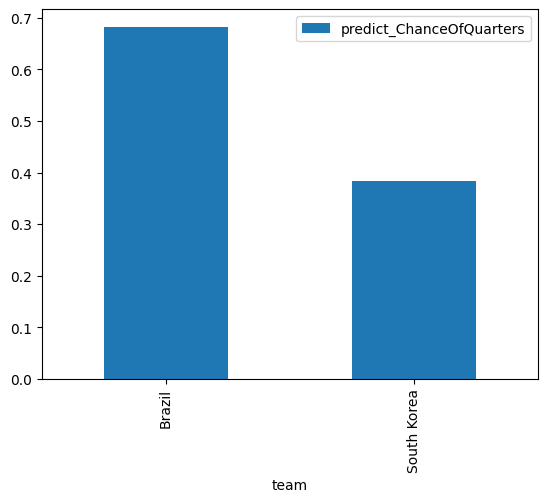

In [4179]:
gameQ4.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [4180]:
WinnerOfGameQ4 = gameQ4.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ4

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,1.0,1.0,0.77131,0.5071,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848,0.682957


In [4181]:
dfQuarter9 = dfCandidateQ[dfCandidateQ.team == "France"]
dfQuarter9

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
4,4,2022-12-06 20:54:12 UTC,France,D,87.5287,2.80437,0.50561,2.0,0.0,1.0,...,0.0,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811,0.925539,0.631793


In [4182]:
dfQuarter10 = dfCandidateQ[dfCandidateQ.team == "Poland"]
dfQuarter10

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
15,15,2022-12-06 20:54:12 UTC,Poland,C,68.04764,1.84609,0.8194,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.012276,0.482294,0.295732


In [4183]:
frameQ5 = [dfQuarter9, dfQuarter10]
gameQ5 = pd.concat(frameQ5)
gameQ5

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,0.0,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811,0.925539,0.631793
15,15,2022-12-06 20:54:12 UTC,Poland,C,68.04764,1.84609,0.81940,1.0,1.0,1.0,...,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.012276,0.482294,0.295732


<AxesSubplot: xlabel='team'>

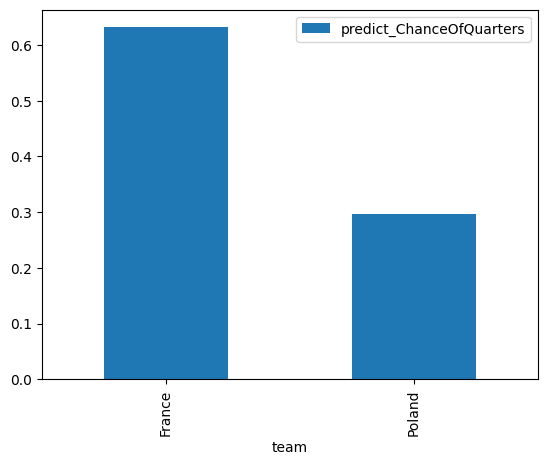

In [4184]:
gameQ5.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [4185]:
WinnerOfGameQ5 = gameQ5.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ5

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
4,4,2022-12-06 20:54:12 UTC,France,D,87.5287,2.80437,0.50561,2.0,0.0,1.0,...,0.0,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811,0.925539,0.631793


In [4186]:
dfQuarter11 = dfCandidateQ[dfCandidateQ.team == "England"]
dfQuarter11

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,0.0,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052,1.195289,0.669143


In [4187]:
dfQuarter12 = dfCandidateQ[dfCandidateQ.team == "Senegal"]
dfQuarter12

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
9,9,2022-12-06 20:54:12 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.052907,0.848739,0.426365


In [4188]:
frameQ6 = [dfQuarter11, dfQuarter12]
gameQ6 = pd.concat(frameQ6)
gameQ6

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,0.0,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052,1.195289,0.669143
9,9,2022-12-06 20:54:12 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.052907,0.848739,0.426365


<AxesSubplot: xlabel='team'>

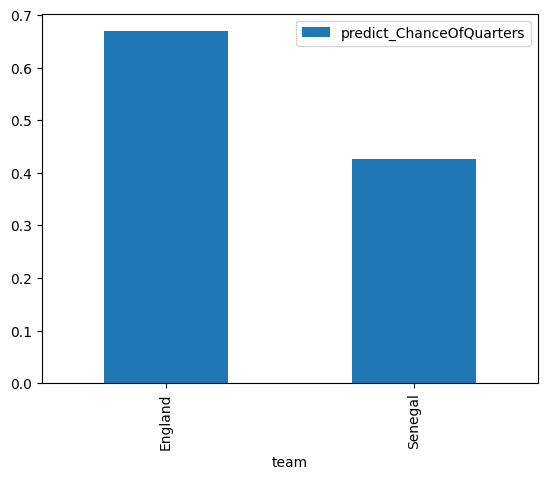

In [4189]:
gameQ6.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [4190]:
WinnerOfGameQ6 = gameQ6.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ6

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,0.0,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052,1.195289,0.669143


In [4191]:
dfQuarter13 = dfCandidateQ[dfCandidateQ.team == "Morocco"]
dfQuarter13

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
7,7,2022-12-06 20:54:12 UTC,Morocco,F,74.44986,1.80298,0.5249,2.0,1.0,0.0,...,0.0,1.0,1.0,0.31749,0.10599,0.03232,2022-12-06 20:55:05 UTC,0.057622,1.008643,0.414502


In [4192]:
dfQuarter14 = dfCandidateQ[dfCandidateQ.team == "Spain"]
dfQuarter14

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
13,13,2022-12-06 20:54:12 UTC,Spain,E,88.50675,2.59723,0.34458,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.046181,0.763641,0.682675


In [4193]:
frameQ7 = [dfQuarter13, dfQuarter14]
gameQ7 = pd.concat(frameQ7)
gameQ7

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
7,7,2022-12-06 20:54:12 UTC,Morocco,F,74.44986,1.80298,0.52490,2.0,1.0,0.0,...,0.0,1.0,1.0,0.31749,0.10599,0.03232,2022-12-06 20:55:05 UTC,0.057622,1.008643,0.414502
13,13,2022-12-06 20:54:12 UTC,Spain,E,88.50675,2.59723,0.34458,1.0,1.0,1.0,...,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.046181,0.763641,0.682675


<AxesSubplot: xlabel='team'>

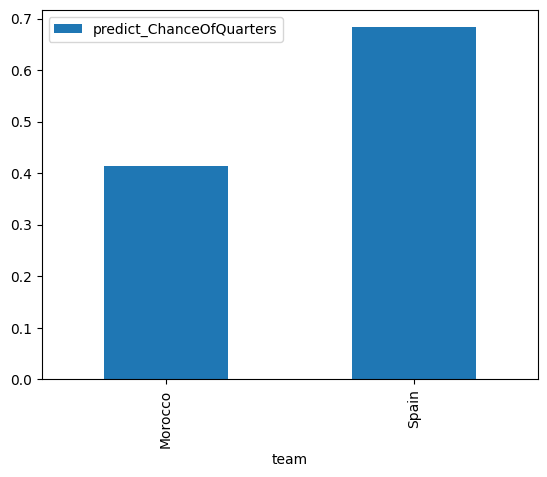

In [4194]:
gameQ7.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [4195]:
WinnerOfGameQ7 = gameQ7.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ7

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
13,13,2022-12-06 20:54:12 UTC,Spain,E,88.50675,2.59723,0.34458,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.046181,0.763641,0.682675


In [4196]:
dfQuarter15 = dfCandidateQ[dfCandidateQ.team == "Portugal"]
dfQuarter15

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624,0.637636


In [4197]:
dfQuarter16 = dfCandidateQ[dfCandidateQ.team == "Switzerland"]
dfQuarter16

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
10,10,2022-12-06 20:54:12 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-06 20:55:05 UTC,0.06404,0.849103,0.443647


In [4198]:
frameQ8 = [dfQuarter15, dfQuarter16]
gameQ8 = pd.concat(frameQ8)
gameQ8

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624,0.637636
10,10,2022-12-06 20:54:12 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.064040,0.849103,0.443647


<AxesSubplot: xlabel='team'>

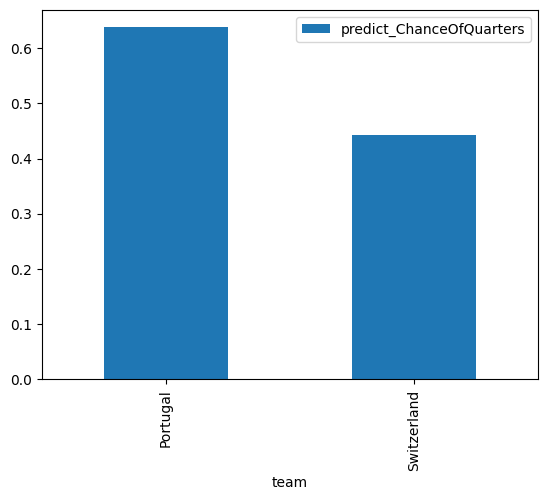

In [4199]:
gameQ8.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [4200]:
WinnerOfGameQ8 = gameQ8.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ8

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624,0.637636


In [4201]:
frame_ROUNDOF16 = [WinnerOfGameQ1, WinnerOfGameQ2, WinnerOfGameQ3, WinnerOfGameQ4, WinnerOfGameQ5, WinnerOfGameQ6, WinnerOfGameQ7, WinnerOfGameQ8]
WinnersOfRound16 = pd.concat(frame_ROUNDOF16)
WinnersOfRound16

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,0.0,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615,1.026648,0.570372
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,0.0,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800,0.936514,0.616632
6,6,2022-12-06 20:54:12 UTC,Croatia,F,78.99496,2.16748,0.57260,1.0,2.0,0.0,...,0.0,1.0,1.0,0.22869,0.09390,0.03901,2022-12-06 20:55:05 UTC,0.038539,0.634488,0.481569
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.0,1.0,1.0,0.77131,0.50710,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848,0.682957
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,0.0,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811,0.925539,0.631793
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,0.0,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052,1.195289,0.669143
13,13,2022-12-06 20:54:12 UTC,Spain,E,88.50675,2.59723,0.34458,1.0,1.0,1.0,...,0.0,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.046181,0.763641,0.682675
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.0,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624,0.637636


In [4202]:
model = LinearRegression()
model = model.fit(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against", "make_round_of_16", "make_quarters"]], dfteam1["make_semis"])
dfteam1["predict_ChanceOfSemi"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against", "make_round_of_16", "make_quarters"]])
dfteam1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,1.0,1.0,0.77131,0.50710,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848,0.682957,0.584439
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624,0.637636,0.558523
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052,1.195289,0.669143,0.448377
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800,0.936514,0.616632,0.528410
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811,0.925539,0.631793,0.532652
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615,1.026648,0.570372,0.485339
6,6,2022-12-06 20:54:12 UTC,Croatia,F,78.99496,2.16748,0.57260,1.0,2.0,0.0,...,1.0,1.0,0.22869,0.09390,0.03901,2022-12-06 20:55:05 UTC,0.038539,0.634488,0.481569,0.417658
7,7,2022-12-06 20:54:12 UTC,Morocco,F,74.44986,1.80298,0.52490,2.0,1.0,0.0,...,1.0,1.0,0.31749,0.10599,0.03232,2022-12-06 20:55:05 UTC,0.057622,1.008643,0.414502,0.444603
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.062536,0.851336,0.436820,0.041536
9,9,2022-12-06 20:54:12 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,1.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.052907,0.848739,0.426365,0.034878


In [4203]:
dfCandidateS = dfteam1.sort_values("predict_ChanceOfSemi", ascending = False)
dfCandidateS

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,1.0,1.0,0.77131,0.50710,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848,0.682957,0.584439
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624,0.637636,0.558523
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811,0.925539,0.631793,0.532652
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800,0.936514,0.616632,0.528410
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615,1.026648,0.570372,0.485339
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052,1.195289,0.669143,0.448377
7,7,2022-12-06 20:54:12 UTC,Morocco,F,74.44986,1.80298,0.52490,2.0,1.0,0.0,...,1.0,1.0,0.31749,0.10599,0.03232,2022-12-06 20:55:05 UTC,0.057622,1.008643,0.414502,0.444603
6,6,2022-12-06 20:54:12 UTC,Croatia,F,78.99496,2.16748,0.57260,1.0,2.0,0.0,...,1.0,1.0,0.22869,0.09390,0.03901,2022-12-06 20:55:05 UTC,0.038539,0.634488,0.481569,0.417658
16,16,2022-12-06 20:54:12 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.064836,0.411614,0.344924,0.081077
22,22,2022-12-06 20:54:12 UTC,Belgium,F,80.91900,2.43900,0.65161,1.0,1.0,1.0,...,0.0,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.058747,0.355158,0.150872,0.056317


In [4204]:
dfCandidateS1 = dfCandidateS[dfCandidateS.team == "Netherlands"]
dfCandidateS1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615,1.026648,0.570372,0.485339


In [4205]:
dfCandidateS2 = dfCandidateS[dfCandidateS.team == "Argentina"]
dfCandidateS2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.5762,0.3988,2.0,0.0,1.0,...,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.0948,0.936514,0.616632,0.52841


In [4206]:
dfCandidateS3 = dfCandidateS[dfCandidateS.team == "Croatia"]
dfCandidateS3

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
6,6,2022-12-06 20:54:12 UTC,Croatia,F,78.99496,2.16748,0.5726,1.0,2.0,0.0,...,1.0,1.0,0.22869,0.0939,0.03901,2022-12-06 20:55:05 UTC,0.038539,0.634488,0.481569,0.417658


In [4207]:
dfCandidateS4 = dfCandidateS[dfCandidateS.team == "Brazil"]
dfCandidateS4

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,1.0,1.0,0.77131,0.5071,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848,0.682957,0.584439


In [4208]:
dfCandidateS5 = dfCandidateS[dfCandidateS.team == "England"]
dfCandidateS5

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052,1.195289,0.669143,0.448377


In [4209]:
dfCandidateS6 = dfCandidateS[dfCandidateS.team == "France"]
dfCandidateS6

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
4,4,2022-12-06 20:54:12 UTC,France,D,87.5287,2.80437,0.50561,2.0,0.0,1.0,...,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811,0.925539,0.631793,0.532652


In [4210]:
dfCandidateS7 = dfCandidateS[dfCandidateS.team == "Morocco"]
dfCandidateS7

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
7,7,2022-12-06 20:54:12 UTC,Morocco,F,74.44986,1.80298,0.5249,2.0,1.0,0.0,...,1.0,1.0,0.31749,0.10599,0.03232,2022-12-06 20:55:05 UTC,0.057622,1.008643,0.414502,0.444603


In [4211]:
dfCandidateS8 = dfCandidateS[dfCandidateS.team == "Portugal"]
dfCandidateS8

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624,0.637636,0.558523


In [4212]:
frameQF1 = [dfCandidateS1, dfCandidateS2]
gameQF1 = pd.concat(frameQF1)
gameQF1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,1.0,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615,1.026648,0.570372,0.485339
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800,0.936514,0.616632,0.528410


<AxesSubplot: xlabel='team'>

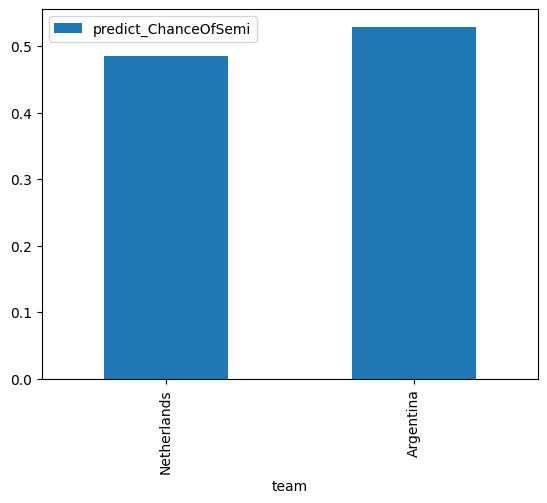

In [4213]:
gameQF1.reset_index().plot.bar(x="team", y="predict_ChanceOfSemi")

In [4214]:
WinnerOfGameQF1 = gameQF1.sort_values("predict_ChanceOfSemi", ascending = False).head(n = 1)
WinnerOfGameQF1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.5762,0.3988,2.0,0.0,1.0,...,1.0,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.0948,0.936514,0.616632,0.52841


In [4215]:
frameQF2 = [dfCandidateS3, dfCandidateS4]
gameQF2 = pd.concat(frameQF2)
gameQF2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
6,6,2022-12-06 20:54:12 UTC,Croatia,F,78.99496,2.16748,0.57260,1.0,2.0,0.0,...,1.0,1.0,0.22869,0.0939,0.03901,2022-12-06 20:55:05 UTC,0.038539,0.634488,0.481569,0.417658
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,1.0,1.0,0.77131,0.5071,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848,0.682957,0.584439


<AxesSubplot: xlabel='team'>

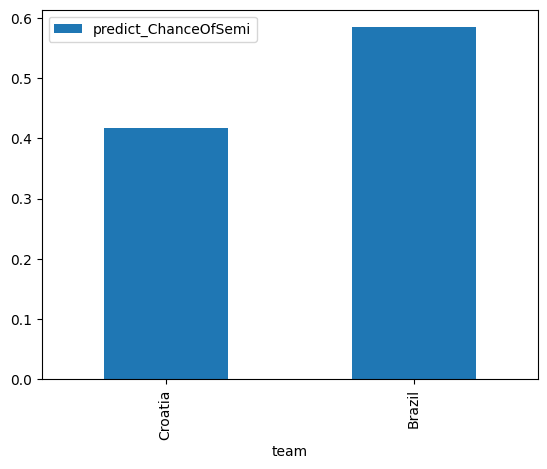

In [4216]:
gameQF2.reset_index().plot.bar(x="team", y="predict_ChanceOfSemi")

In [4217]:
WinnerOfGameQF2 = gameQF2.sort_values("predict_ChanceOfSemi", ascending = False).head(n = 1)
WinnerOfGameQF2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,1.0,1.0,0.77131,0.5071,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848,0.682957,0.584439


In [4218]:
frameQF3 = [dfCandidateS5, dfCandidateS6]
gameQF3 = pd.concat(frameQF3)
gameQF3

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,1.0,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052,1.195289,0.669143,0.448377
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811,0.925539,0.631793,0.532652


<AxesSubplot: xlabel='team'>

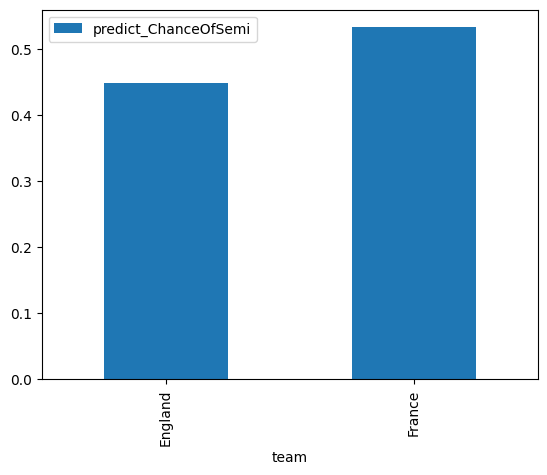

In [4219]:
gameQF3.reset_index().plot.bar(x="team", y="predict_ChanceOfSemi")

In [4220]:
WinnerOfGameQF3 = gameQF3.sort_values("predict_ChanceOfSemi", ascending = False).head(n = 1)
WinnerOfGameQF3

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
4,4,2022-12-06 20:54:12 UTC,France,D,87.5287,2.80437,0.50561,2.0,0.0,1.0,...,1.0,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811,0.925539,0.631793,0.532652


In [4221]:
frameQF4 = [dfCandidateS7, dfCandidateS8]
gameQF4 = pd.concat(frameQF4)
gameQF4

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
7,7,2022-12-06 20:54:12 UTC,Morocco,F,74.44986,1.80298,0.52490,2.0,1.0,0.0,...,1.0,1.0,0.31749,0.10599,0.03232,2022-12-06 20:55:05 UTC,0.057622,1.008643,0.414502,0.444603
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624,0.637636,0.558523


<AxesSubplot: xlabel='team'>

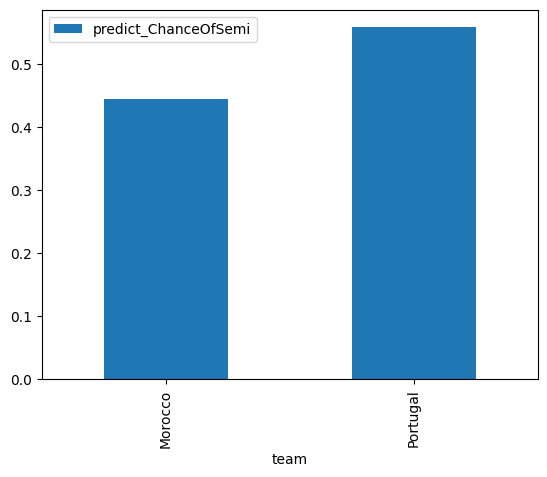

In [4222]:
gameQF4.reset_index().plot.bar(x="team", y="predict_ChanceOfSemi")

In [4223]:
WinnerOfGameQF4 = gameQF4.sort_values("predict_ChanceOfSemi", ascending = False).head(n = 1)
WinnerOfGameQF4

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,1.0,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624,0.637636,0.558523


In [4224]:
model = LinearRegression()
model = model.fit(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against", "make_round_of_16", "make_quarters", "make_semis"]], dfteam1["make_final"])
dfteam1["predict_ChanceOfFinal"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against", "make_round_of_16", "make_quarters", "make_semis"]])
dfteam1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,1.0,0.77131,0.50710,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848,0.682957,0.584439,0.444327
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624,0.637636,0.558523,0.377986
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052,1.195289,0.669143,0.448377,0.261406
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800,0.936514,0.616632,0.528410,0.303388
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811,0.925539,0.631793,0.532652,0.237219
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615,1.026648,0.570372,0.485339,0.195613
6,6,2022-12-06 20:54:12 UTC,Croatia,F,78.99496,2.16748,0.57260,1.0,2.0,0.0,...,1.0,0.22869,0.09390,0.03901,2022-12-06 20:55:05 UTC,0.038539,0.634488,0.481569,0.417658,0.061810
7,7,2022-12-06 20:54:12 UTC,Morocco,F,74.44986,1.80298,0.52490,2.0,1.0,0.0,...,1.0,0.31749,0.10599,0.03232,2022-12-06 20:55:05 UTC,0.057622,1.008643,0.414502,0.444603,0.118251
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.062536,0.851336,0.436820,0.041536,-0.003418
9,9,2022-12-06 20:54:12 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.052907,0.848739,0.426365,0.034878,-0.004295


In [4225]:
dfCandidateF = dfteam1.sort_values("predict_ChanceOfFinal", ascending = False)
dfCandidateF

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,1.0,0.77131,0.50710,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848,0.682957,0.584439,0.444327
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624,0.637636,0.558523,0.377986
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800,0.936514,0.616632,0.528410,0.303388
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,1.0,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052,1.195289,0.669143,0.448377,0.261406
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811,0.925539,0.631793,0.532652,0.237219
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,1.0,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615,1.026648,0.570372,0.485339,0.195613
7,7,2022-12-06 20:54:12 UTC,Morocco,F,74.44986,1.80298,0.52490,2.0,1.0,0.0,...,1.0,0.31749,0.10599,0.03232,2022-12-06 20:55:05 UTC,0.057622,1.008643,0.414502,0.444603,0.118251
6,6,2022-12-06 20:54:12 UTC,Croatia,F,78.99496,2.16748,0.57260,1.0,2.0,0.0,...,1.0,0.22869,0.09390,0.03901,2022-12-06 20:55:05 UTC,0.038539,0.634488,0.481569,0.417658,0.061810
27,27,2022-12-06 20:54:12 UTC,Denmark,D,76.68220,2.04580,0.59589,0.0,1.0,2.0,...,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.011132,-0.051615,0.088354,-0.002388,0.006921
13,13,2022-12-06 20:54:12 UTC,Spain,E,88.50675,2.59723,0.34458,1.0,1.0,1.0,...,0.0,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.046181,0.763641,0.682675,-0.037299,0.005916


In [4226]:
frameSF1 = [dfCandidateF[dfCandidateF.team == "Argentina"], dfCandidateF[dfCandidateF.team == "Brazil"]]
gameSF1 = pd.concat(frameSF1)
gameSF1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,1.0,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800,0.936514,0.616632,0.528410,0.303388
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,1.0,0.77131,0.50710,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848,0.682957,0.584439,0.444327


<AxesSubplot: xlabel='team'>

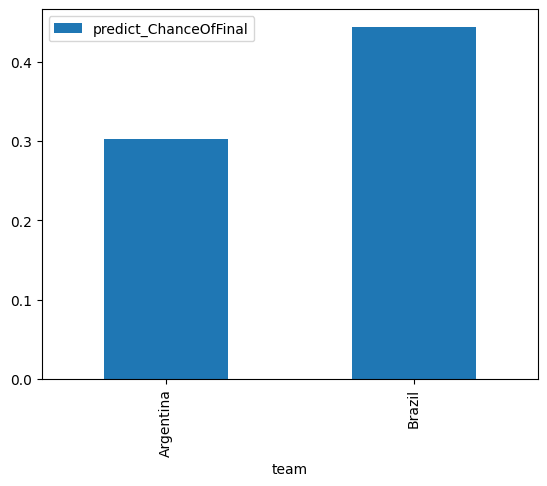

In [4227]:
gameSF1.reset_index().plot.bar(x="team", y="predict_ChanceOfFinal")

In [4228]:
WinnerOfGameSF1 = gameSF1.sort_values("predict_ChanceOfFinal", ascending = False).head(n = 1)
WinnerOfGameSF1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,1.0,0.77131,0.5071,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848,0.682957,0.584439,0.444327


In [4229]:
frameSF2 = [dfCandidateF[dfCandidateF.team == "France"], dfCandidateF[dfCandidateF.team == "Portugal"]]
gameSF2 = pd.concat(frameSF2)
gameSF2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,1.0,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811,0.925539,0.631793,0.532652,0.237219
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624,0.637636,0.558523,0.377986


<AxesSubplot: xlabel='team'>

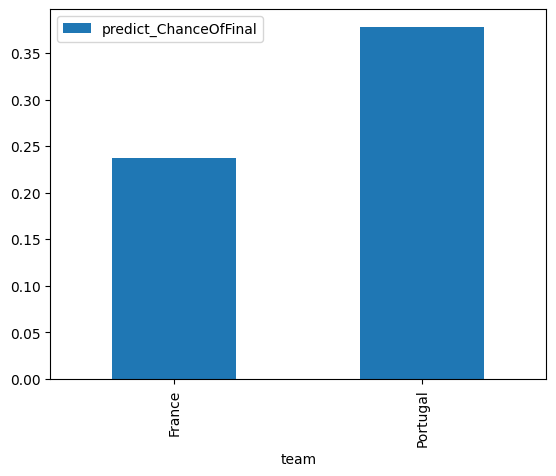

In [4230]:
gameSF2.reset_index().plot.bar(x="team", y="predict_ChanceOfFinal")

In [4231]:
WinnerOfGameSF2 = gameSF2.sort_values("predict_ChanceOfFinal", ascending = False).head(n = 1)
WinnerOfGameSF2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,1.0,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624,0.637636,0.558523,0.377986


In [4232]:
model = LinearRegression()
model = model.fit(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against", "make_round_of_16", "make_quarters", "make_semis", "make_final"]], dfteam1["win_league"])
dfteam1["predict_ChanceOfWinLeague"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against", "make_round_of_16", "make_quarters", "make_semis", "make_final"]])
dfteam1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal,predict_ChanceOfWinLeague
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.77131,0.50710,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848,0.682957,0.584439,0.444327,0.306646
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624,0.637636,0.558523,0.377986,0.165369
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052,1.195289,0.669143,0.448377,0.261406,0.151030
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800,0.936514,0.616632,0.528410,0.303388,0.113202
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811,0.925539,0.631793,0.532652,0.237219,0.141589
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615,1.026648,0.570372,0.485339,0.195613,0.058032
6,6,2022-12-06 20:54:12 UTC,Croatia,F,78.99496,2.16748,0.57260,1.0,2.0,0.0,...,0.22869,0.09390,0.03901,2022-12-06 20:55:05 UTC,0.038539,0.634488,0.481569,0.417658,0.061810,0.032463
7,7,2022-12-06 20:54:12 UTC,Morocco,F,74.44986,1.80298,0.52490,2.0,1.0,0.0,...,0.31749,0.10599,0.03232,2022-12-06 20:55:05 UTC,0.057622,1.008643,0.414502,0.444603,0.118251,0.031670
8,8,2022-12-06 20:54:12 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.062536,0.851336,0.436820,0.041536,-0.003418,0.000742
9,9,2022-12-06 20:54:12 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.052907,0.848739,0.426365,0.034878,-0.004295,-0.001989


In [4233]:
dfCandidateW = dfteam1.sort_values("predict_ChanceOfWinLeague", ascending = False)
dfCandidateW

c:\Users\August Hu\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal,predict_ChanceOfWinLeague
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.77131,0.50710,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848,0.682957,0.584439,0.444327,0.306646
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624,0.637636,0.558523,0.377986,0.165369
2,2,2022-12-06 20:54:12 UTC,England,B,87.58969,2.65733,0.42584,2.0,1.0,0.0,...,0.51539,0.29599,0.13556,2022-12-06 20:55:05 UTC,0.077052,1.195289,0.669143,0.448377,0.261406,0.151030
4,4,2022-12-06 20:54:12 UTC,France,D,87.52870,2.80437,0.50561,2.0,0.0,1.0,...,0.48461,0.27046,0.11868,2022-12-06 20:55:05 UTC,0.090811,0.925539,0.631793,0.532652,0.237219,0.141589
3,3,2022-12-06 20:54:12 UTC,Argentina,C,87.32471,2.57620,0.39880,2.0,0.0,1.0,...,0.57583,0.24429,0.13042,2022-12-06 20:55:05 UTC,0.094800,0.936514,0.616632,0.528410,0.303388,0.113202
5,5,2022-12-06 20:54:12 UTC,Netherlands,A,84.18963,2.54424,0.54804,2.0,1.0,0.0,...,0.42417,0.15471,0.07378,2022-12-06 20:55:05 UTC,0.084615,1.026648,0.570372,0.485339,0.195613,0.058032
6,6,2022-12-06 20:54:12 UTC,Croatia,F,78.99496,2.16748,0.57260,1.0,2.0,0.0,...,0.22869,0.09390,0.03901,2022-12-06 20:55:05 UTC,0.038539,0.634488,0.481569,0.417658,0.061810,0.032463
7,7,2022-12-06 20:54:12 UTC,Morocco,F,74.44986,1.80298,0.52490,2.0,1.0,0.0,...,0.31749,0.10599,0.03232,2022-12-06 20:55:05 UTC,0.057622,1.008643,0.414502,0.444603,0.118251,0.031670
22,22,2022-12-06 20:54:12 UTC,Belgium,F,80.91900,2.43900,0.65161,1.0,1.0,1.0,...,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.058747,0.355158,0.150872,0.056317,0.001327,0.006644
27,27,2022-12-06 20:54:12 UTC,Denmark,D,76.68220,2.04580,0.59589,0.0,1.0,2.0,...,0.00000,0.00000,0.00000,2022-12-06 20:55:05 UTC,0.011132,-0.051615,0.088354,-0.002388,0.006921,0.005693


In [4237]:
frameW1 = [dfCandidateW[dfCandidateW.team == "Brazil"], dfCandidateW[dfCandidateW.team == "Portugal"]]
gameW1 = pd.concat(frameW1)
gameW1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal,predict_ChanceOfWinLeague
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.77131,0.50710,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848,0.682957,0.584439,0.444327,0.306646
1,1,2022-12-06 20:54:12 UTC,Portugal,H,87.92472,2.89158,0.52748,2.0,0.0,1.0,...,0.68251,0.32756,0.14112,2022-12-06 20:55:05 UTC,0.092097,0.848624,0.637636,0.558523,0.377986,0.165369


<AxesSubplot: xlabel='team'>

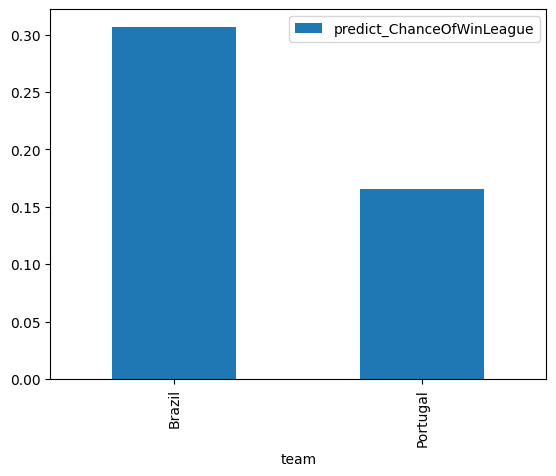

In [4238]:
gameW1.reset_index().plot.bar(x="team", y="predict_ChanceOfWinLeague")

In [4240]:
WinnerOfGameW1 = gameW1.sort_values("predict_ChanceOfWinLeague", ascending = False).head(n = 1)
WinnerOfGameW1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal,predict_ChanceOfWinLeague
0,0,2022-12-06 20:54:12 UTC,Brazil,G,93.46631,3.17048,0.28151,2.0,0.0,1.0,...,0.77131,0.5071,0.32911,2022-12-06 20:55:05 UTC,0.124059,0.851848,0.682957,0.584439,0.444327,0.306646
